<a href="https://colab.research.google.com/github/harish678/Audio-Processing/blob/master/Audio_Processing_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial on load and display Audio

In [0]:
# feature extractoring and preprocessing data
import librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Preprocessing
from sklearn.preprocessing import minmax_scale

import warnings
warnings.filterwarnings('ignore')

## Loading Audio using Librosa

In [28]:
audio = 'and_they_all_lived_happily_ever_after.mp3'
x , sr = librosa.load(audio) # returns audio time-series as Numpy array and the sampling rate(sr)

print('Shape of the audio time-series: {0}, sampling rate: {1}'.format(x.shape, sr))

Shape of the audio time-series: (1292544,), sampling rate: 22050


## Diplaying the Audio file

In [29]:
import IPython.display as ipd
ipd.Audio(audio)

## Visualizing Audio

### Waveform

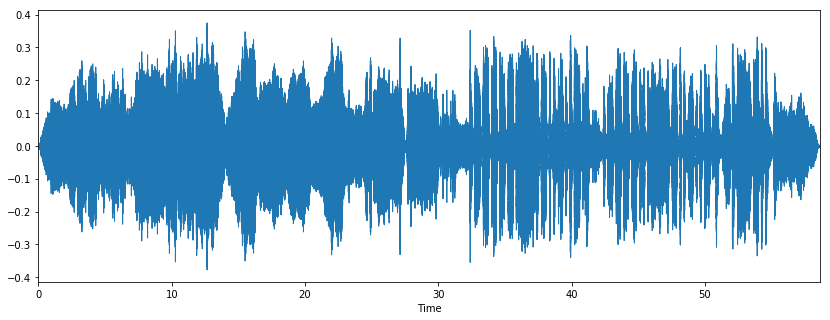

In [30]:
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

### Spectrogram

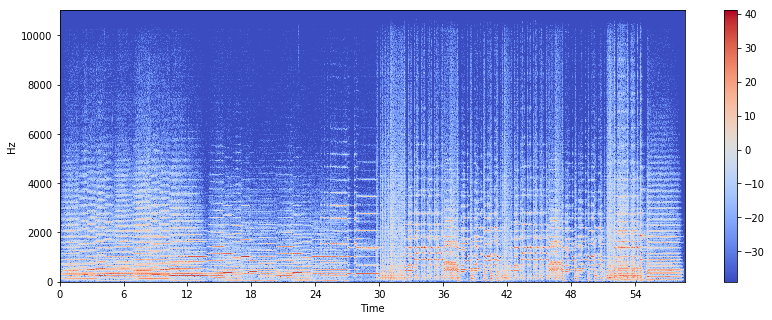

In [31]:
X = librosa.stft(x)                     # Short-time Fourier transform (STFT)
Xdb = librosa.amplitude_to_db(abs(X))   # Convert an amplitude spectrogram to dB-scaled spectrogram

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

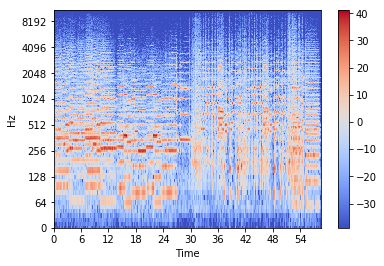

In [32]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')  # low specturm visualization of the wave.
plt.colorbar()
plt.show()

## Creating an Audio Signal

In [33]:
sr = 22050 # sample rate
T = 5.0    # seconds

t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable

sin_audio = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
cosine_audio = 0.5*np.cos(2*np.pi*220*t)# pure cosine wave at 220 Hz

ipd.Audio(sin_audio, rate=sr)

In [34]:
ipd.Audio(cosine_audio, rate=sr)

In [0]:
#Saving the audio
librosa.output.write_wav('sin_220.wav', sin_audio, sr)
librosa.output.write_wav('cosine_220.wav', cosine_audio, sr)

## Feature extraction

### Zero Crossing Rate
<br>
The zero crossing rate is the *rate of sign-changes along a signal,* i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both **speech recognition** and **music information retrieval**. 

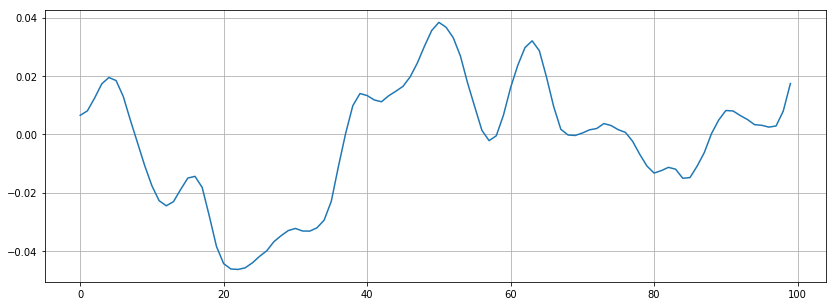

In [36]:
audio = 'and_they_all_lived_happily_ever_after.mp3'
x , sr = librosa.load(audio)

# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()
plt.show()

There appear to be 8 zero crossings. Let’s verify with librosa.

In [37]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

8


### Spectral Centroid
<br>
It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. 

Spectral Centroids Shape:  (2525,)


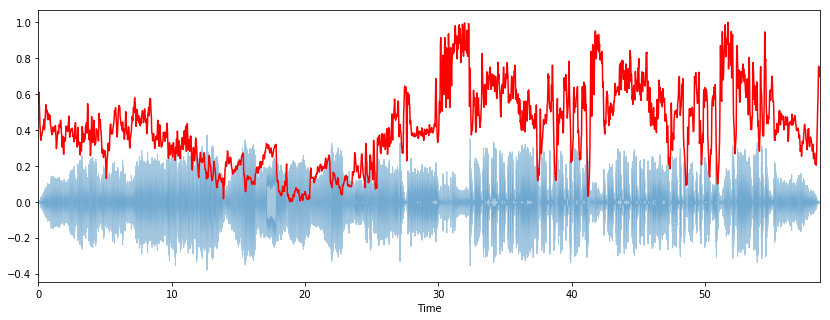

In [38]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
print('Spectral Centroids Shape: ',spectral_centroids.shape)

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)
  
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

There is a rise in the spectral centroid towards the end

### Spectral Rolloff
<br>
It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.


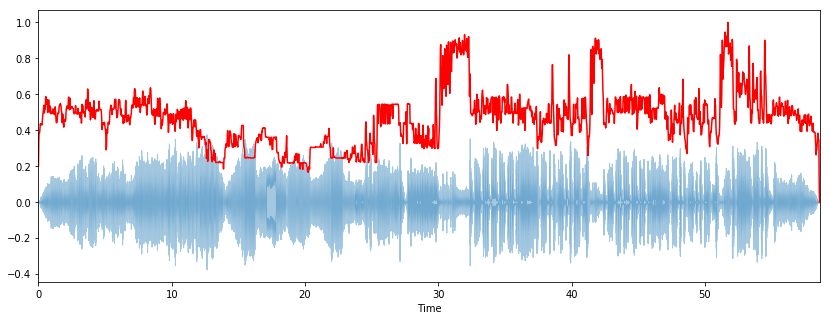

In [39]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]

#Plotting the Spectral Rolloff along the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.show()

### Mel-Frequency Cepstral Coefficients

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

(20, 2525)


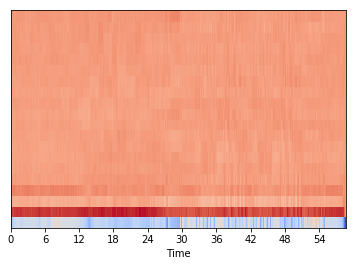

In [40]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

Here mfcc computed 20 MFCC s over 2525 frames.

### Chroma Frequencies
<br>
Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

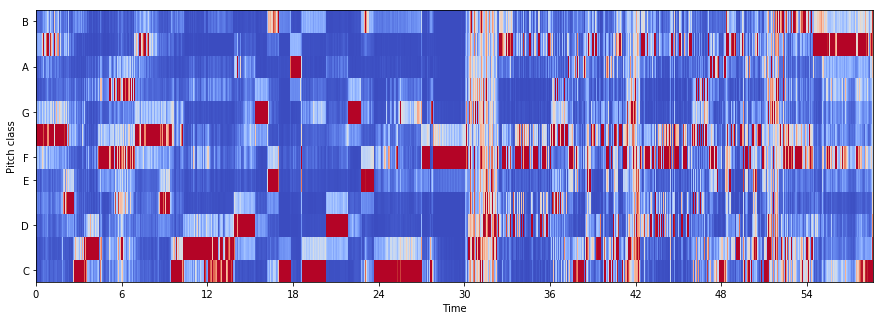

In [41]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.show()